In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
#read the data set
df = pd.read_csv("d6_2m_5tm.csv")
df_copy = df.copy()

In [3]:
#display the data set
df.head()

,oven,officeLight,officeDoor,office,mainDoor,livingLight,kitchenLight,kitchenDoor,hallwayLight,fridge,couch,bedroomLight,bedroomDoor,bedTableLamp,bed,bathroomLight,bathroomDoor,Activity,timestamp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,sleep,2016-02-01 08:01:08
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,sleep,2016-02-01 08:01:09
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sleep,2016-02-01 08:01:10
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sleep,2016-02-01 08:01:11
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sleep,2016-02-01 08:01:12


In [4]:
#convert the timestamp column to datatime
pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

0        2016-02-01 08:01:08
1        2016-02-01 08:01:09
2        2016-02-01 08:01:10
3        2016-02-01 08:01:11
4        2016-02-01 08:01:12
                 ...        
174184   2016-03-03 19:01:02
174185   2016-03-03 19:01:03
174186   2016-03-03 19:01:04
174187   2016-03-03 19:01:05
174188   2016-03-03 19:01:06
Name: timestamp, Length: 174189, dtype: datetime64[ns]

In [5]:
#change some values in the data set to create anomalies in the data in order to show a probable application

# Licht im Badezimmer
df['bathroomLight'] = 0
df['bathroomLight'].iloc[34700:34750] = 1
df['bathroomLight'].iloc[35658:40000] = 1

# Bewegung im Badezimmer
df['bathroomDoor'] = 0
df['bathroomDoor'].iloc[34700:34750] = 1
df['bathroomDoor'].iloc[35657:35700] = 1

# Licht im Schlafzimmer
df['bedroomLightt'] = 0

# Bewegung im Schlafzimmer
df['bedroomDoor'] = 0
df['bedroomDoor'].iloc[34500:34656] = 1

# Licht im Kueche
df['kitchenLight'] = 0
df['kitchenLight'].iloc[34805:35000] = 1

# Bewegung im Kueche
df['kitchenDoor'] = 0
df['kitchenDoor'].iloc[34805:35000] = 1

# Licht im Wohnzimmer
df['livingLight'] = 0
df['livingLight'].iloc[35002:35650] = 1

# Bewegung im Wohnzimmer
df['livingDoor'] = 0
df['livingDoor'].iloc[35002:35050] = 1
df['livingDoor'].iloc[35302:35400] = 1
df['livingDoor'].iloc[35002:35650] = 1

/home/engimary/anaconda3/envs/greenhackathon/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
#choose data of one day from the data set
df_new = df[(df['timestamp']<='2016-02-13 23:59:00') & (df['timestamp']>='2016-02-13 08:00:00')]

<IPython.core.display.Javascript object>


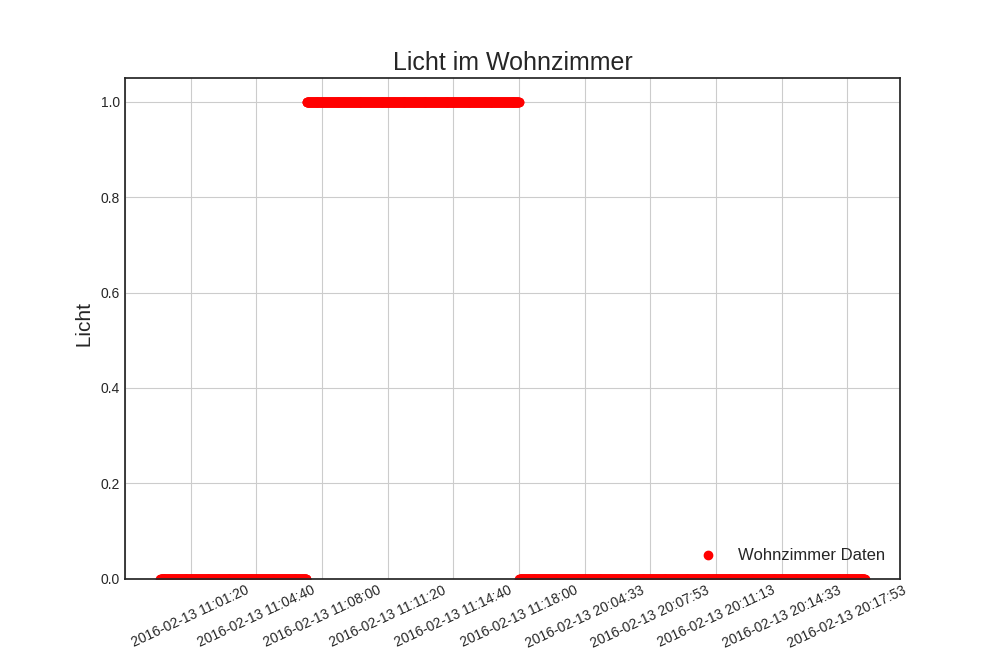

In [7]:
# visualize the light activities in different rooms
######################################
place = 'Wohnzimmer'
feature = 'living'+'Light'
######################################

%matplotlib notebook
plt.style.use('seaborn-white')

fig, ax = plt.subplots()
ax.set_title('Licht im '+place, fontsize=18)
fig.set_size_inches(10, 6.5, forward=True)

plt.ylabel(' Licht', fontsize=15)
plt.xlabel('Zeit', fontsize=15)

plt.plot(df_new['timestamp'], df_new[feature], 'ro', label=place+' Daten')

ax=plt.gca()

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 200))
plt.xticks(rotation=25)

plt.grid()
plt.gca().set_ylim(0)

plt.legend(loc="lower right", fontsize=12)
plt.savefig(feature+".png")
plt.show()

<IPython.core.display.Javascript object>


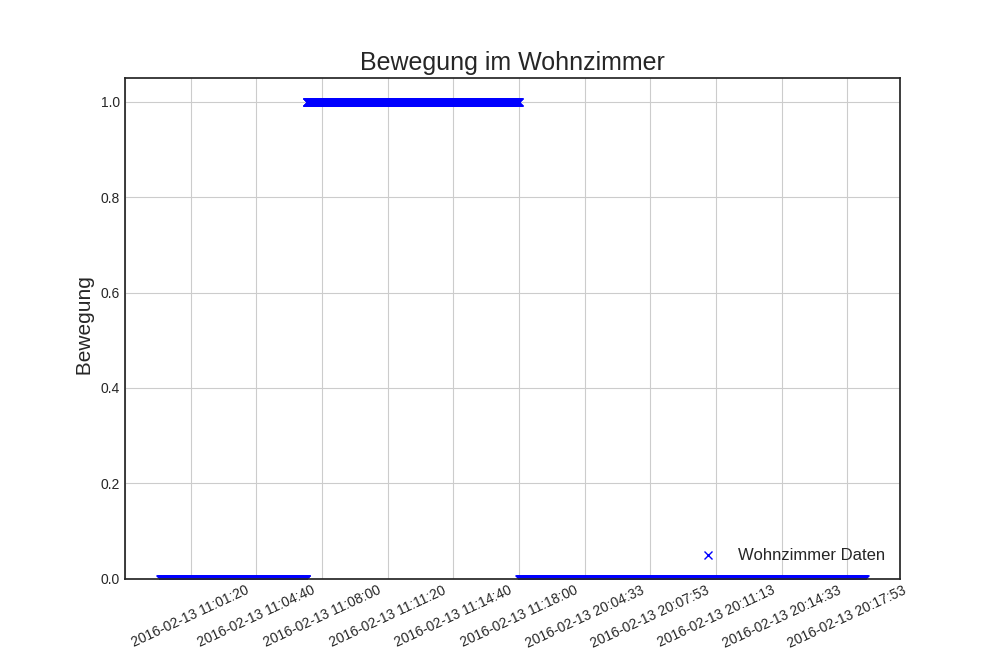

In [8]:
# visualize the movement activities in different rooms
######################################
place = 'Wohnzimmer'
feature = 'living'+'Door'
######################################

%matplotlib notebook
plt.style.use('seaborn-white')

fig, ax = plt.subplots()
ax.set_title('Bewegung im '+place, fontsize=18)
fig.set_size_inches(10, 6.5, forward=True)

plt.ylabel(' Bewegung', fontsize=15)
plt.xlabel('Zeit', fontsize=15)

plt.plot(df_new['timestamp'], df_new[feature], 'bx', label=place+' Daten')

ax=plt.gca()

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 200))
plt.xticks(rotation=25)

plt.grid()
plt.gca().set_ylim(0)

plt.legend(loc="lower right", fontsize=12)
plt.savefig(feature+".png")
plt.show()

In [9]:
#find out the changes in states of the sensors to recognize different activities (movement, light, etc.)
room = 'kitchenLight'
time = []
activity = []

for i in range(len(df)-1):
    if df_copy[room][i+1] != df_copy[room][i]:
        time.append(df['timestamp'][i])
        activity.append(room)
    
print("activity recognized")
        

activity recognized


In [10]:
#show the result of activity detection
result = pd.DataFrame(data={"Time":time, "Activity":activity})
result

,Time,Activity
0,2016-02-01 08:02:52,kitchenLight
1,2016-02-01 08:07:01,kitchenLight
2,2016-02-01 18:39:35,kitchenLight
3,2016-02-01 18:43:46,kitchenLight
4,2016-02-02 07:33:26,kitchenLight
...,...,...
207,2016-03-02 18:12:39,kitchenLight
208,2016-03-03 08:01:26,kitchenLight
209,2016-03-03 08:05:35,kitchenLight
210,2016-03-03 18:33:20,kitchenLight


In [ ]:
import sys
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtWidgets import QMainWindow, QLabel, QGridLayout, QWidget
from PyQt5.QtWidgets import QPushButton
from PyQt5.QtWidgets import QMessageBox
from PyQt5.QtCore import QSize    
from PyQt5.QtWidgets import * 
from PyQt5.QtGui import * 


class MainWindow(QMainWindow):
    def __init__(self):
        QMainWindow.__init__(self)

        self.setMinimumSize(QSize(300, 200))    
        self.setWindowTitle("PyQt messagebox example - pythonprogramminglanguage.com") 

        pybutton = QPushButton('Show messagebox', self)
        pybutton.clicked.connect(self.clickMethod)
        pybutton.resize(200,64)
        pybutton.move(50, 50)        

    def clickMethod(self):
        #QMessageBox.about(self, "Title", "Message")
        msg = QMessageBox(self)
        msg.setIcon(QMessageBox.Critical)
        msg.setText("ALARM")
        msg.setFont(QFont("Ubuntu", 20))
        msg.setInformativeText('Die Person mit der ID 38758 benötigt möglicherweise Ihre Hilfe.\n\nEs könnte einige Anomalien in seinen Aktivitätsdaten geben.')
        msg.setWindowTitle("ALARM")
        msg.show()

app = QtWidgets.QApplication(sys.argv)
mainWin = MainWindow()
mainWin.show()
sys.exit( app.exec_() )

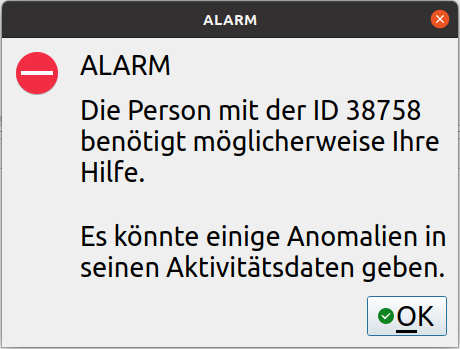

In [11]:
Image.open("pics/warning_message.png")